<a href="https://colab.research.google.com/github/Madhuram2901/ANDROIDCLUB_Marketing_Campaign/blob/main/Customer_Segmentation_for_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# **Loading Dataset**

In [ ]:
path = pd.read_csv("/content/marketing_campaign.csv", sep = "\t")

In [ ]:
df = pd.DataFrame(path)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **Numerical Data**

In [ ]:
numerical_data = [feature for feature in df.columns if df[feature].dtype != 'object']
numerical_data

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

# **Continuos Data**

In [ ]:
cont_data = [feature for feature in df.columns if df[feature].dtype == 'object']
cont_data

['Education', 'Marital_Status', 'Dt_Customer']

In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df['Income']

,Income
0,58138.0
1,46344.0
2,71613.0
3,26646.0
4,58293.0
...,...
2235,61223.0
2236,64014.0
2237,56981.0
2238,69245.0


In [ ]:
df["Income"].mean()

52247.25135379061

In [ ]:
df["Income"] = df["Income"].fillna(df["Income"].mean())

In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# **Data Cleaning and Feature Engineering**

In [ ]:
df['Age'] = 2024 - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace = True)
## Removed Year of Birth and put AGE instead of it for customer details enhancemnet.

In [ ]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,67
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,70
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,59
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,40
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,43


In [ ]:
df['Z_CostContact'].head()

,Z_CostContact
0,3
1,3
2,3
3,3
4,3


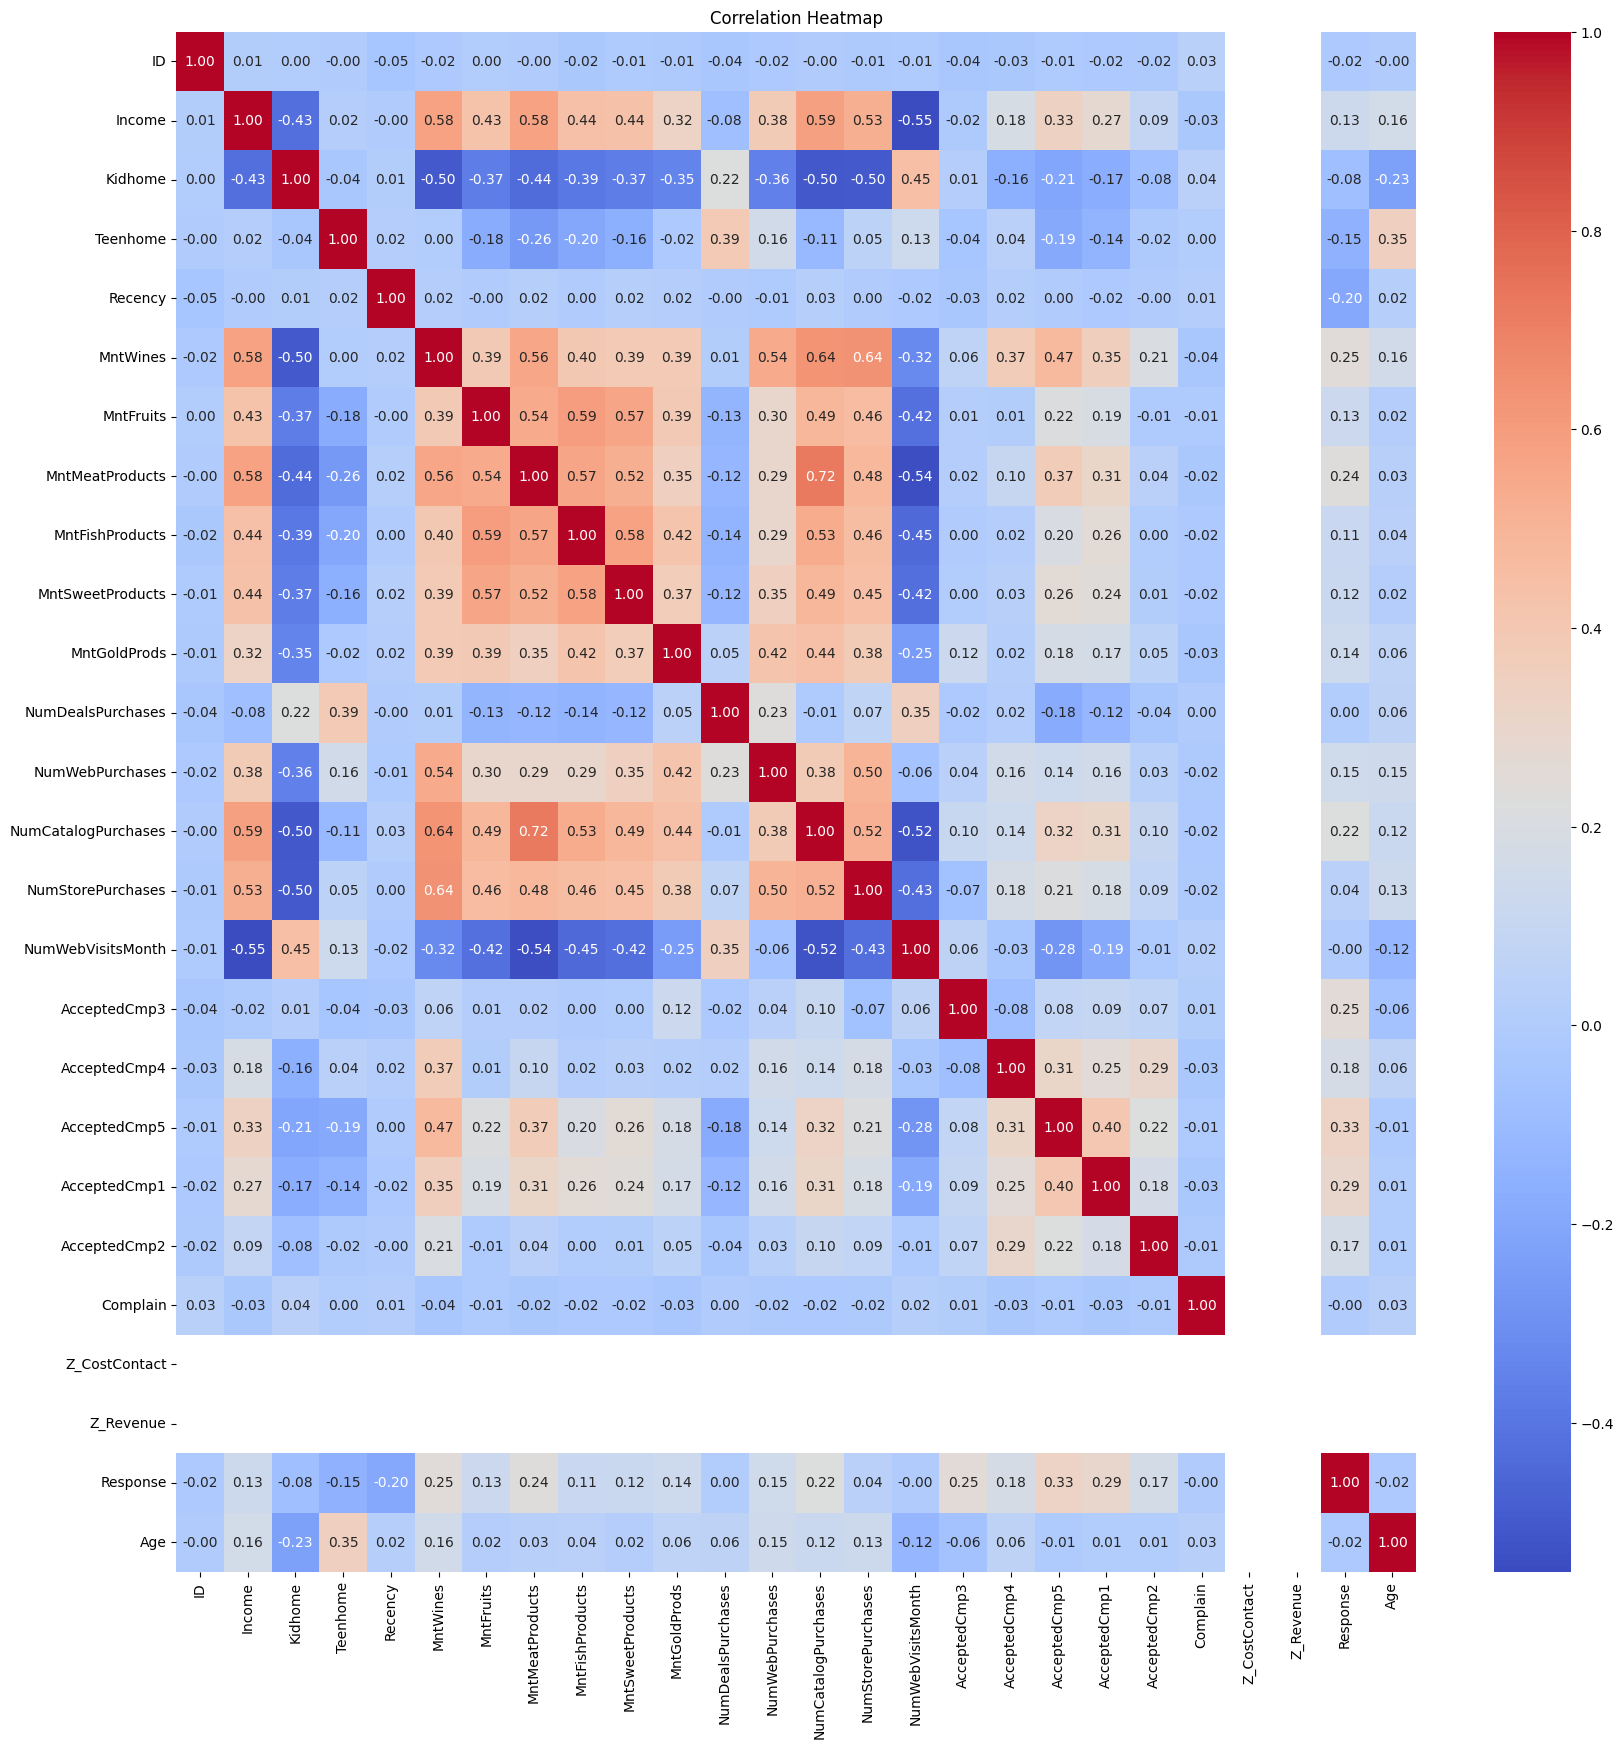

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.drop('Z_CostContact', axis=1, inplace = True)
df.drop('Z_Revenue', axis=1, inplace = True)
df.drop('ID', axis=1, inplace = True)
df.drop('Marital_Status', axis=1, inplace = True)
df.drop('Education', axis=1, inplace= True)
df.drop('Dt_Customer', axis=1, inplace= True)
df.drop('Complain', axis=1, inplace= True)

In [ ]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age
0,58138.0,0,0,58,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,1,67
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,70
2,71613.0,0,0,26,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,59
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,40
4,58293.0,1,0,94,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,43


In [ ]:
expenditure = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpend'] = df[expenditure].sum(axis=1)

df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,TotalSpend
0,58138.0,0,0,58,635,88,546,172,88,88,...,4,7,0,0,0,0,0,1,67,1617
1,46344.0,1,1,38,11,1,6,2,1,6,...,2,5,0,0,0,0,0,0,70,27
2,71613.0,0,0,26,426,49,127,111,21,42,...,10,4,0,0,0,0,0,0,59,776
3,26646.0,1,0,26,11,4,20,10,3,5,...,4,6,0,0,0,0,0,0,40,53
4,58293.0,1,0,94,173,43,118,46,27,15,...,6,5,0,0,0,0,0,0,43,422


In [ ]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,TotalSpend
0,58138.0,0,0,58,635,88,546,172,88,88,...,4,7,0,0,0,0,0,1,67,1617
1,46344.0,1,1,38,11,1,6,2,1,6,...,2,5,0,0,0,0,0,0,70,27
2,71613.0,0,0,26,426,49,127,111,21,42,...,10,4,0,0,0,0,0,0,59,776
3,26646.0,1,0,26,11,4,20,10,3,5,...,4,6,0,0,0,0,0,0,40,53
4,58293.0,1,0,94,173,43,118,46,27,15,...,6,5,0,0,0,0,0,0,43,422


### **Scaling**

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Age', 'Income', 'TotalSpend',
        'MntWines', 'MntMeatProducts',
        'NumWebPurchases', 'NumStorePurchases']])

## **Clustering**

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

cluster_df = df[['Age', 'Income', 'TotalSpend', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases']]

imputer = SimpleImputer(strategy='mean')
cluster_df_imputed = imputer.fit_transform(cluster_df)

cluster_df = pd.DataFrame(cluster_df_imputed, columns=cluster_df.columns, index=cluster_df.index)

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_df)

cluster_summary = df.groupby('Cluster').agg({col: 'mean' for col in cluster_df.columns})
cluster_summary

,Age,Income,TotalSpend,MntWines,MntMeatProducts,NumWebPurchases,NumStorePurchases
Cluster,,,,,,,
0,53.159383,35032.418194,173.944302,83.487575,39.457584,2.790917,3.696658
1,47.000000,666666.000000,62.000000,9.000000,18.000000,3.000000,3.000000
2,57.416978,70414.500933,1076.430037,544.194963,305.879664,5.494403,8.071828


# **Data Visualization**

## **PCA (Principal Component Analysis)**

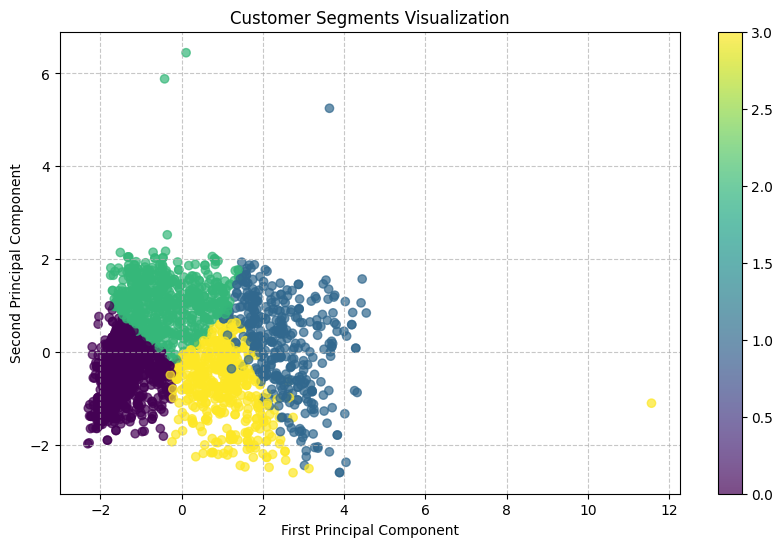

In [ ]:
from sklearn.decomposition import PCA
def plot_clustering(X):
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                          c=clusters,
                          cmap='viridis',
                          alpha=0.7)

    plt.title('Customer Segments Visualization')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

features = ['Income', 'Age', 'TotalSpend', 'MntWines']
X = df[features]
plot_clustering(X)